In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import settings as conf

# Figures path

In [3]:
figures_path = os.path.join(conf.DELIVERABLES_DIR, 'figures')
os.makedirs(figures_path, exist_ok=True)

# Load gene mappings

In [4]:
with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-0.pkl'), 'rb') as f:
    genes_mapping_0 = pickle.load(f)

with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-1.pkl'), 'rb') as f:
    genes_mapping_1 = pickle.load(f)

# Load S-MultiXcan results

In [5]:
spredixcan_genes_associations_filename = os.path.join(conf.GENE_ASSOC_DIR, 'smultixcan-mashr-pvalues.pkl.xz')
display(spredixcan_genes_associations_filename)

spredixcan_genes_associations = pd.read_pickle(spredixcan_genes_associations_filename)

'/mnt/phenomexcan_base/gene_assoc/smultixcan-mashr-pvalues.pkl.xz'

In [6]:
spredixcan_genes_associations.shape

(22515, 4091)

In [7]:
spredixcan_genes_associations.head(5)

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.865429,0.918314,0.810683,0.374671,0.189032,0.140981,0.467741,0.129427,0.193680,0.285479,...,0.416210,0.782554,0.609467,0.980281,0.666504,0.409761,0.713310,0.168319,0.460244,0.765506
ENSG00000000457,0.174192,0.064765,0.889194,0.896938,0.448596,0.269602,0.540261,0.068405,0.041813,0.313427,...,0.149360,0.512603,0.010907,0.228982,0.607081,0.812484,0.678749,0.918971,0.311187,0.344574
ENSG00000000460,0.879969,0.240715,0.238228,0.567555,0.921320,0.825036,0.782230,0.644525,0.392273,0.840014,...,0.503520,0.764147,0.587969,0.301460,0.629621,0.486664,0.736509,0.933600,0.000477,0.321223
ENSG00000000938,0.192670,0.400054,0.114353,0.470700,0.889202,0.000011,0.899764,0.212352,0.829671,0.372348,...,0.899212,0.961678,0.059247,0.588855,0.898525,0.135045,0.954998,0.088220,0.176497,0.304281
ENSG00000000971,0.180632,0.793060,0.490585,0.088752,0.744531,0.949639,0.253817,0.377408,0.971655,0.070266,...,0.390618,0.093824,0.020391,0.109883,0.870551,0.995450,0.002660,0.421588,0.656851,0.868416


# QQ plots

In [8]:
import plots
from entity import Trait

# All p-values

In [9]:
all_pvalues = pd.Series(spredixcan_genes_associations.values.flatten()).dropna()
display(all_pvalues.shape)

(91055810,)

In [10]:
all_pvalues.describe()

count     9.105581e+07
mean      4.839226e-01
std       2.934763e-01
min      9.999889e-321
25%       2.266266e-01
50%       4.794625e-01
75%       7.378647e-01
max       1.000000e+00
dtype: float64

In [11]:
(-np.log10(all_pvalues)).describe()

count    9.105581e+07
mean     4.990325e-01
std      1.258476e+00
min     -0.000000e+00
25%      1.320233e-01
50%      3.192453e-01
75%      6.446892e-01
max      3.200000e+02
dtype: float64

In [12]:
#all_pvalues_samples = all_pvalues.sample(n=1000)
all_pvalues_samples = all_pvalues

In [13]:
threshold = 1e-30

unif_values = np.linspace(0.0001, 1, num=all_pvalues_samples.shape[0])
unif_values[unif_values < threshold] = threshold

real_values = all_pvalues_samples
real_values[real_values < threshold] = threshold

df = pd.DataFrame({'unif': unif_values, 'real': real_values})

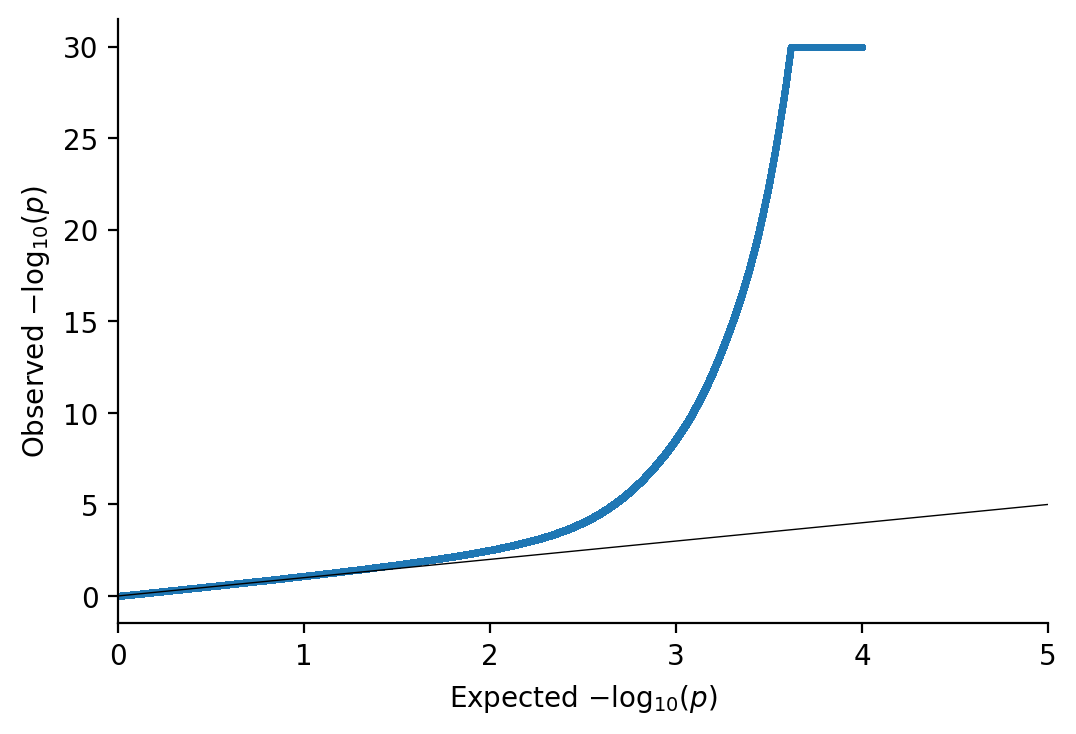

In [14]:
df_plot = df

ax = plots.qqplot(-np.log10(df_plot), 'unif', 'real', xlabel='Expected $-\log_{10}(p)$', ylabel='Observed $-\log_{10}(p)$', s=5, linewidth=0)
ax.set_xlim([0, 5])

fig_path = os.path.join(figures_path, 'sup_fig1-phenomexcan_qqplot.png')
plt.savefig(fig_path, dpi=150, bbox_inches='tight')